## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
import pandas as pd
titanic_df = pd.read_csv('titanic.csv')

In [4]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
survival_rates_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
survival_rates_by_class = survival_rates_by_class.reset_index()
survival_rates_by_class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Rate by Passenger Class')

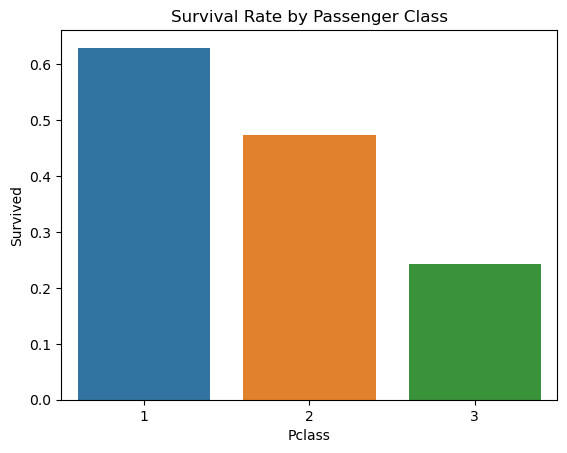

In [28]:
sns.barplot(x = 'Pclass', y = 'Survived', data = survival_rates_by_class)
plt.title("Survival Rate by Passenger Class")

In [36]:
import scipy.stats as stats
contingency_table = pd.crosstab(titanic_df['Survived'], titanic_df['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [35]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
chi2, p, dof, expected

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

In [37]:
survival_rates_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
survival_rates_by_gender = survival_rates_by_gender.reset_index()
survival_rates_by_gender

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Rate by Gender')

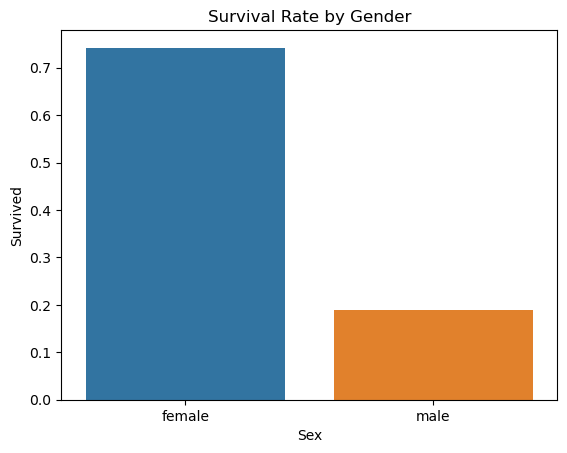

In [40]:
sns.barplot(x = 'Sex', y = 'Survived', data = survival_rates_by_gender)
plt.title("Survival Rate by Gender")

In [38]:
contingency_table_gender = pd.crosstab(titanic_df['Survived'], titanic_df['Sex'])
contingency_table_gender

Sex,female,male
Survived,,
0,81,468
1,233,109


In [39]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_gender)
chi2, p, dof, expected

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

In [58]:
age_bins = [0,18,100]
age_labels = ['Children','Adult']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)
survival_rates_by_age = titanic_df.groupby('AgeGroup')['Survived'].mean()
survival_rates_by_age = survival_rates_by_age.reset_index()
survival_rates_by_age

,AgeGroup,Survived
0,Children,0.503597
1,Adult,0.382609


In [55]:
contingency_table_age = pd.crosstab(titanic_df['Survived'], titanic_df['AgeGroup'])
contingency_table_age

AgeGroup,Children,Adult
Survived,,
0,69,355
1,70,220


Text(0.5, 1.0, 'Survival Rate by Age')

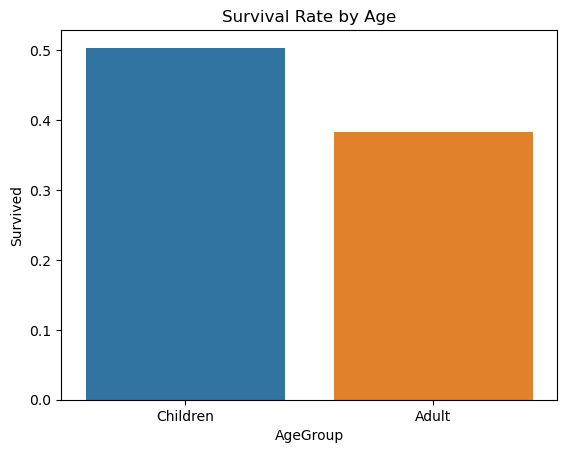

In [60]:
sns.barplot(x = 'AgeGroup', y = 'Survived', data = survival_rates_by_age)
plt.title("Survival Rate by Age")

In [59]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_age)
chi2, p, dof, expected

(6.301311052021158,
 0.012064871031697809,
 1,
 array([[ 82.54341737, 341.45658263],
        [ 56.45658263, 233.54341737]]))